# Assignment - Advanced Regression

### Problem Statement

A US-based housing company named Surprise Housing has decided to enter the Australian market. The company uses data analytics to purchase houses at a price below their actual values and flip them at a higher price.
The company is looking at prospective properties to buy to enter the market.<br>
The company wants to know:
- Which variables are significant in predicting the price of a house, and
- How well those variables describe the price of a house.<br><br>

You are required to model the price of houses with the available independent variables. This model will then be used by the management to understand how exactly the prices vary with the variables. They can accordingly manipulate the strategy of the firm and concentrate on areas that will yield high returns. Further, the model will be a good way for the management to understand the pricing dynamics of a new market.


### Reading and Understanding the data

In [1]:
#import all the necessary libraries

import pandas as pd
import numpy as np
import pandas as pd

# For Visualisation
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# To Scale our data
from sklearn.preprocessing import scale

In [2]:
train = pd.read_csv('train.csv')
train.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [3]:
print(train.shape)

(1460, 81)


In [4]:
train.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


### Data Preparation and Visualization

#### Treating Null Values
Let's begin by checking the percentage of null values are present in each row, to get rid of rows that have a really large number of nulls

In [5]:
(train.isnull().sum()/len(train)).sort_values(ascending = False)

PoolQC           0.995205
MiscFeature      0.963014
Alley            0.937671
Fence            0.807534
FireplaceQu      0.472603
LotFrontage      0.177397
GarageCond       0.055479
GarageType       0.055479
GarageYrBlt      0.055479
GarageFinish     0.055479
GarageQual       0.055479
BsmtExposure     0.026027
BsmtFinType2     0.026027
BsmtFinType1     0.025342
BsmtCond         0.025342
BsmtQual         0.025342
MasVnrArea       0.005479
MasVnrType       0.005479
Electrical       0.000685
Utilities        0.000000
YearRemodAdd     0.000000
MSSubClass       0.000000
Foundation       0.000000
ExterCond        0.000000
ExterQual        0.000000
Exterior2nd      0.000000
Exterior1st      0.000000
RoofMatl         0.000000
RoofStyle        0.000000
YearBuilt        0.000000
                   ...   
GarageArea       0.000000
PavedDrive       0.000000
WoodDeckSF       0.000000
OpenPorchSF      0.000000
3SsnPorch        0.000000
BsmtUnfSF        0.000000
ScreenPorch      0.000000
PoolArea    

Let's drop all the columns that have more than 30% of values as null. This will also include columns that are massively skewed to one feature - feature imbalance

In [6]:
train.drop(columns=['PoolQC', 'MiscFeature', 'Alley', 'Fence'], inplace=True)

In [7]:
train.shape

(1460, 77)

For the remaining columns with missing values, let's treat them one at a time based on the column description

**FireplaceQu**

In [8]:
train['FireplaceQu'].unique()

array([nan, 'TA', 'Gd', 'Fa', 'Ex', 'Po'], dtype=object)

The FireplaceQu column has values that rate the fireplace from Poor to Excellent. We can convert this column to numeric with a scale representing the rating of the fireplace (0 - missing fireplace, 5- excellent)

In [9]:
# Replacing the values with ratings
train.loc[train['FireplaceQu'].isnull(),'FireplaceQu'] = 0
train.loc[train['FireplaceQu']=='Po','FireplaceQu'] = 1
train.loc[train['FireplaceQu']=='Fa','FireplaceQu'] = 2
train.loc[train['FireplaceQu']=='TA','FireplaceQu'] = 3
train.loc[train['FireplaceQu']=='Gd','FireplaceQu'] = 4
train.loc[train['FireplaceQu']=='Ex','FireplaceQu'] = 5


In [10]:
train['FireplaceQu'].value_counts()

0    690
4    380
3    313
2     33
5     24
1     20
Name: FireplaceQu, dtype: int64

**LotFrontage**

The LotFrontage refers to the linear feet of street connected to property. This would very much be dependent on the zone that the property find itself in. Let's impute the missing values in this column with the average LotFrontage values for the respective zones

In [11]:
by_MSZoning = train.groupby('MSZoning')['LotFrontage'].mean()
by_MSZoning

MSZoning
C (all)    69.700000
FV         59.491228
RH         58.923077
RL         74.680043
RM         52.366834
Name: LotFrontage, dtype: float64

Replace the LotFrontage missing values with the above values based on the corresponding MSZoning value

In [12]:
train.loc[(train['LotFrontage'].isnull()) & (train['MSZoning'] == 'FV'),'LotFrontage'] = by_MSZoning['FV']
train.loc[(train['LotFrontage'].isnull()) & (train['MSZoning'] == 'RH'),'LotFrontage'] = by_MSZoning['RH']
train.loc[(train['LotFrontage'].isnull()) & (train['MSZoning'] == 'RL'),'LotFrontage'] = by_MSZoning['RL']
train.loc[(train['LotFrontage'].isnull()) & (train['MSZoning'] == 'RM'),'LotFrontage'] = by_MSZoning['RM']


In [13]:
train['LotFrontage'].isnull().sum()

0

**GarageType**

The missing Garage Type values correspond to those houses that don't have a garage, hence we can replace these with a new category as 'NoGarage'

In [14]:
train.loc[train['GarageType'].isnull(),'GarageType'] = 'NoGarage'

In [15]:
train['GarageType'].isnull().sum()

0

In [16]:
train['GarageType'].value_counts()

Attchd      870
Detchd      387
BuiltIn      88
NoGarage     81
Basment      19
CarPort       9
2Types        6
Name: GarageType, dtype: int64

**GarageFinish**

All the missing values in this column can be replaced with 'NoG' representing the house has no garage

In [17]:
train['GarageFinish'].unique()

array(['RFn', 'Unf', 'Fin', nan], dtype=object)

In [18]:
train.loc[train['GarageFinish'].isnull(), 'GarageFinish'] = 'NoG'

In [19]:
train['GarageFinish'].value_counts()

Unf    605
RFn    422
Fin    352
NoG     81
Name: GarageFinish, dtype: int64

**GarageCond and GarageQual**

These columns have values that rate the garage condition and quality from Poor to Excellent. We can convert this column to numeric with a scale representing the rating of the garage (0 - missing garage, 5- excellent)

In [20]:
train['GarageCond'].unique()

array(['TA', 'Fa', nan, 'Gd', 'Po', 'Ex'], dtype=object)

In [21]:
# Replacing the values with ratings
train.loc[train['GarageCond'].isnull(),'GarageCond'] = 0
train.loc[train['GarageCond']=='Po','GarageCond'] = 1
train.loc[train['GarageCond']=='Fa','GarageCond'] = 2
train.loc[train['GarageCond']=='TA','GarageCond'] = 3
train.loc[train['GarageCond']=='Gd','GarageCond'] = 4
train.loc[train['GarageCond']=='Ex','GarageCond'] = 5

In [22]:
train['GarageCond'].value_counts()

3    1326
0      81
2      35
4       9
1       7
5       2
Name: GarageCond, dtype: int64

In [23]:
train['GarageQual'].unique()

array(['TA', 'Fa', 'Gd', nan, 'Ex', 'Po'], dtype=object)

In [24]:
# Replacing the values with ratings
train.loc[train['GarageQual'].isnull(),'GarageQual'] = 0
train.loc[train['GarageQual']=='Po','GarageQual'] = 1
train.loc[train['GarageQual']=='Fa','GarageQual'] = 2
train.loc[train['GarageQual']=='TA','GarageQual'] = 3
train.loc[train['GarageQual']=='Gd','GarageQual'] = 4
train.loc[train['GarageQual']=='Ex','GarageQual'] = 5

In [25]:
train['GarageQual'].value_counts()

3    1311
0      81
2      48
4      14
5       3
1       3
Name: GarageQual, dtype: int64

**BsmtCond and BsmtQual**

In [26]:
train['BsmtCond'].unique()

array(['TA', 'Gd', nan, 'Fa', 'Po'], dtype=object)

In [27]:
# Replacing the values with ratings
train.loc[train['BsmtCond'].isnull(),'BsmtCond'] = 0
train.loc[train['BsmtCond']=='Po','BsmtCond'] = 1
train.loc[train['BsmtCond']=='Fa','BsmtCond'] = 2
train.loc[train['BsmtCond']=='TA','BsmtCond'] = 3
train.loc[train['BsmtCond']=='Gd','BsmtCond'] = 4

In [28]:
train['BsmtCond'].value_counts()

3    1311
4      65
2      45
0      37
1       2
Name: BsmtCond, dtype: int64

In [29]:
train['BsmtQual'].unique()

array(['Gd', 'TA', 'Ex', nan, 'Fa'], dtype=object)

In [30]:
# Replacing the values with ratings
train.loc[train['BsmtQual'].isnull(),'BsmtQual'] = 0
train.loc[train['BsmtQual']=='Po','BsmtQual'] = 1
train.loc[train['BsmtQual']=='Fa','BsmtQual'] = 2
train.loc[train['BsmtQual']=='TA','BsmtQual'] = 3
train.loc[train['BsmtQual']=='Gd','BsmtQual'] = 4
train.loc[train['BsmtQual']=='Ex','BsmtQual'] = 5

In [31]:
train['BsmtQual'].value_counts()

3    649
4    618
5    121
0     37
2     35
Name: BsmtQual, dtype: int64

**BsmtExposure**

The Basement Exposure column has categories split by levels of Min, Avg, Good etc. These can be converted to a scale of 0 to 4 (0 - missing basement, 4 - Good Exposure) 

In [32]:
train['BsmtExposure'].unique()

array(['No', 'Gd', 'Mn', 'Av', nan], dtype=object)

In [33]:
# Replacing the values with ratings
train.loc[train['BsmtExposure'].isnull(),'BsmtExposure'] = 0
train.loc[train['BsmtExposure']=='No','BsmtExposure'] = 1
train.loc[train['BsmtExposure']=='Mn','BsmtExposure'] = 2
train.loc[train['BsmtExposure']=='Av','BsmtExposure'] = 3
train.loc[train['BsmtExposure']=='Gd','BsmtExposure'] = 4


In [34]:
train['BsmtExposure'].value_counts()

1    953
3    221
4    134
2    114
0     38
Name: BsmtExposure, dtype: int64

In [35]:
train['BsmtExposure'].isnull().sum()

0

**BsmtFinType1 and BsmtFinType2**

Then Basement Finishing type columns are rating based columns, and these can be converted to numerical levels

In [36]:
train['BsmtFinType1'].unique()

array(['GLQ', 'ALQ', 'Unf', 'Rec', 'BLQ', nan, 'LwQ'], dtype=object)

In [37]:
# Replacing the values with ratings
train.loc[train['BsmtFinType1'].isnull(),'BsmtFinType1'] = 0
train.loc[train['BsmtFinType1']=='Unf','BsmtFinType1'] = 1
train.loc[train['BsmtFinType1']=='LwQ','BsmtFinType1'] = 2
train.loc[train['BsmtFinType1']=='Rec','BsmtFinType1'] = 3
train.loc[train['BsmtFinType1']=='BLQ','BsmtFinType1'] = 4
train.loc[train['BsmtFinType1']=='ALQ','BsmtFinType1'] = 5
train.loc[train['BsmtFinType1']=='GLQ','BsmtFinType1'] = 6

In [38]:
train['BsmtFinType1'].value_counts()

1    430
6    418
5    220
4    148
3    133
2     74
0     37
Name: BsmtFinType1, dtype: int64

In [39]:
train['BsmtFinType1'].isnull().sum()

0

In [40]:
train['BsmtFinType2'].unique()

array(['Unf', 'BLQ', nan, 'ALQ', 'Rec', 'LwQ', 'GLQ'], dtype=object)

In [41]:
# Replacing the values with ratings
train.loc[train['BsmtFinType2'].isnull(),'BsmtFinType2'] = 0
train.loc[train['BsmtFinType2']=='Unf','BsmtFinType2'] = 1
train.loc[train['BsmtFinType2']=='LwQ','BsmtFinType2'] = 2
train.loc[train['BsmtFinType2']=='Rec','BsmtFinType2'] = 3
train.loc[train['BsmtFinType2']=='BLQ','BsmtFinType2'] = 4
train.loc[train['BsmtFinType2']=='ALQ','BsmtFinType2'] = 5
train.loc[train['BsmtFinType2']=='GLQ','BsmtFinType2'] = 6

In [42]:
train['BsmtFinType2'].value_counts()

1    1256
3      54
2      46
0      38
4      33
5      19
6      14
Name: BsmtFinType2, dtype: int64

In [43]:
train['BsmtFinType2'].isnull().sum()

0

**MasVnrType and MasVnrArea**

In [44]:
train['MasVnrType'].unique()

array(['BrkFace', 'None', 'Stone', 'BrkCmn', nan], dtype=object)

In [45]:
train['MasVnrType'].value_counts()

None       864
BrkFace    445
Stone      128
BrkCmn      15
Name: MasVnrType, dtype: int64

In [46]:
train['MasVnrArea'].isnull().sum()

8

In [47]:
train['MasVnrType'].isnull().sum()

8

We see that majority of the houses don't have a Masonry Veener. Let's replace the missing value in the MasVnrType with 'None' and MasVnrArea with 0

In [48]:
train.loc[train['MasVnrType'].isnull(),'MasVnrType'] = 'None'
train.loc[train['MasVnrArea'].isnull(),'MasVnrArea'] = 0

**Electrical**

In [49]:
train['Electrical'].unique()

array(['SBrkr', 'FuseF', 'FuseA', 'FuseP', 'Mix', nan], dtype=object)

In [50]:
train['Electrical'].value_counts()

SBrkr    1334
FuseA      94
FuseF      27
FuseP       3
Mix         1
Name: Electrical, dtype: int64

Replace the missing value in the electrical column with the maximuim count of category in that column  i.e. SBrkr

In [51]:
train.loc[train['Electrical'].isnull(),'Electrical'] = 'SBrkr'

Now that we have treated all the missing values in the dataset - and also taken care of a few categorical variables by converting the levels into numerical levels, let's go ahead and perform some exploratory analysis

Before we go ahead with EDA, let's identify all the categorical variables that have levels within them and are viable of being converted to numerical levels

In [52]:
# Identifying all the columns with levels
cols_levels = ['LandSlope','OverallQual','OverallCond','ExterQual','ExterCond','BsmtQual','BsmtCond',
               'BsmtExposure','BsmtFinType1','BsmtFinType2','HeatingQC','CentralAir','KitchenQual','FireplaceQu',
               'GarageFinish','GarageQual','GarageCond']

**Converting Categprical variables with levels to numerical levels**

In [53]:
train[cols_levels].head()

,LandSlope,OverallQual,OverallCond,ExterQual,ExterCond,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinType2,HeatingQC,CentralAir,KitchenQual,FireplaceQu,GarageFinish,GarageQual,GarageCond
0,Gtl,7,5,Gd,TA,4,3,1,6,1,Ex,Y,Gd,0,RFn,3,3
1,Gtl,6,8,TA,TA,4,3,4,5,1,Ex,Y,TA,3,RFn,3,3
2,Gtl,7,5,Gd,TA,4,3,2,6,1,Ex,Y,Gd,3,RFn,3,3
3,Gtl,7,5,TA,TA,3,4,1,5,1,Gd,Y,Gd,4,Unf,3,3
4,Gtl,8,5,Gd,TA,4,3,3,6,1,Ex,Y,Gd,3,RFn,3,3


**LandSlope Column**

In [54]:
train['LandSlope'].unique()

array(['Gtl', 'Mod', 'Sev'], dtype=object)

In [55]:
# Replacing the values with ratings
train.loc[train['LandSlope']=='Sev','LandSlope'] = 1
train.loc[train['LandSlope']=='Mod','LandSlope'] = 2
train.loc[train['LandSlope']=='Gtl','LandSlope'] = 3

**ExterQual**

In [56]:
train['ExterQual'].unique()

array(['Gd', 'TA', 'Ex', 'Fa'], dtype=object)

In [57]:
# Replacing the values with ratings
train.loc[train['ExterQual']=='Po','ExterQual'] = 1
train.loc[train['ExterQual']=='Fa','ExterQual'] = 2
train.loc[train['ExterQual']=='TA','ExterQual'] = 3
train.loc[train['ExterQual']=='Gd','ExterQual'] = 4
train.loc[train['ExterQual']=='Ex','ExterQual'] = 5

**ExterCond**

In [58]:
train['ExterCond'].unique()

array(['TA', 'Gd', 'Fa', 'Po', 'Ex'], dtype=object)

In [59]:
# Replacing the values with ratings
train.loc[train['ExterCond']=='Po','ExterCond'] = 1
train.loc[train['ExterCond']=='Fa','ExterCond'] = 2
train.loc[train['ExterCond']=='TA','ExterCond'] = 3
train.loc[train['ExterCond']=='Gd','ExterCond'] = 4
train.loc[train['ExterCond']=='Ex','ExterCond'] = 5

**HeatingQC**

In [60]:
train['HeatingQC'].unique()

array(['Ex', 'Gd', 'TA', 'Fa', 'Po'], dtype=object)

In [61]:
# Replacing the values with ratings
train.loc[train['HeatingQC']=='Po','HeatingQC'] = 1
train.loc[train['HeatingQC']=='Fa','HeatingQC'] = 2
train.loc[train['HeatingQC']=='TA','HeatingQC'] = 3
train.loc[train['HeatingQC']=='Gd','HeatingQC'] = 4
train.loc[train['HeatingQC']=='Ex','HeatingQC'] = 5

**CentralAir**

In [62]:
train['CentralAir'].unique()

array(['Y', 'N'], dtype=object)

In [63]:
train.loc[train['CentralAir']=='Y','CentralAir'] = 1
train.loc[train['CentralAir']=='N','CentralAir'] = 0

**KitchenQual**

In [64]:
train['KitchenQual'].unique()

array(['Gd', 'TA', 'Ex', 'Fa'], dtype=object)

In [65]:
# Replacing the values with ratings
train.loc[train['KitchenQual']=='Po','KitchenQual'] = 1
train.loc[train['KitchenQual']=='Fa','KitchenQual'] = 2
train.loc[train['KitchenQual']=='TA','KitchenQual'] = 3
train.loc[train['KitchenQual']=='Gd','KitchenQual'] = 4
train.loc[train['KitchenQual']=='Ex','KitchenQual'] = 5

**GarageFinish**

In [66]:
train['GarageFinish'].unique()

array(['RFn', 'Unf', 'Fin', 'NoG'], dtype=object)

In [67]:
# Replacing the values with ratings
train.loc[train['GarageFinish']=='NoG','GarageFinish'] = 1
train.loc[train['GarageFinish']=='Unf','GarageFinish'] = 2
train.loc[train['GarageFinish']=='RFn','GarageFinish'] = 3
train.loc[train['GarageFinish']=='Fin','GarageFinish'] = 4

In [68]:
train[cols_levels].head()

,LandSlope,OverallQual,OverallCond,ExterQual,ExterCond,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinType2,HeatingQC,CentralAir,KitchenQual,FireplaceQu,GarageFinish,GarageQual,GarageCond
0,3,7,5,4,3,4,3,1,6,1,5,1,4,0,3,3,3
1,3,6,8,3,3,4,3,4,5,1,5,1,3,3,3,3,3
2,3,7,5,4,3,4,3,2,6,1,5,1,4,3,3,3,3
3,3,7,5,3,3,3,4,1,5,1,4,1,4,4,2,3,3
4,3,8,5,4,3,4,3,3,6,1,5,1,4,3,3,3,3


**LotShape**

In [69]:
train['LotShape'].unique()

array(['Reg', 'IR1', 'IR2', 'IR3'], dtype=object)

In [70]:
# Replacing the values with ratings
train.loc[train['LotShape']=='IR3','LotShape'] = 1
train.loc[train['LotShape']=='IR2','LotShape'] = 2
train.loc[train['LotShape']=='IR1','LotShape'] = 3
train.loc[train['LotShape']=='Reg','LotShape'] = 4

### Deriving New Variables

The **Garage Built Year** itself doesn't provide a good enough variable for prediction. Instead, a better interpretation of the year would be to determine the age of the garage from the current year - 2019

In [71]:
train['GarageYrBlt'].unique()

array([2003., 1976., 2001., 1998., 2000., 1993., 2004., 1973., 1931.,
       1939., 1965., 2005., 1962., 2006., 1960., 1991., 1970., 1967.,
       1958., 1930., 2002., 1968., 2007., 2008., 1957., 1920., 1966.,
       1959., 1995., 1954., 1953.,   nan, 1983., 1977., 1997., 1985.,
       1963., 1981., 1964., 1999., 1935., 1990., 1945., 1987., 1989.,
       1915., 1956., 1948., 1974., 2009., 1950., 1961., 1921., 1900.,
       1979., 1951., 1969., 1936., 1975., 1971., 1923., 1984., 1926.,
       1955., 1986., 1988., 1916., 1932., 1972., 1918., 1980., 1924.,
       1996., 1940., 1949., 1994., 1910., 1978., 1982., 1992., 1925.,
       1941., 2010., 1927., 1947., 1937., 1942., 1938., 1952., 1928.,
       1922., 1934., 1906., 1914., 1946., 1908., 1929., 1933.])

Also, let's replace the missing value with -1 indicating no garage

In [72]:
train['GarageAge'] = train['YrSold'] - train['GarageYrBlt']

# Replace the missing values with -1
train.loc[train['GarageAge'].isnull(),'GarageAge']=-1

In [73]:
# Drop the GarageYrBlt column
train.drop(columns='GarageYrBlt',inplace=True)

The **House Built Year** itself doesn't provide a good enough variable for prediction. Instead, a better interpretation of the year would be to determine the age of the house from the year of selling

In [74]:
train['YearBuilt'].unique()

array([2003, 1976, 2001, 1915, 2000, 1993, 2004, 1973, 1931, 1939, 1965,
       2005, 1962, 2006, 1960, 1929, 1970, 1967, 1958, 1930, 2002, 1968,
       2007, 1951, 1957, 1927, 1920, 1966, 1959, 1994, 1954, 1953, 1955,
       1983, 1975, 1997, 1934, 1963, 1981, 1964, 1999, 1972, 1921, 1945,
       1982, 1998, 1956, 1948, 1910, 1995, 1991, 2009, 1950, 1961, 1977,
       1985, 1979, 1885, 1919, 1990, 1969, 1935, 1988, 1971, 1952, 1936,
       1923, 1924, 1984, 1926, 1940, 1941, 1987, 1986, 2008, 1908, 1892,
       1916, 1932, 1918, 1912, 1947, 1925, 1900, 1980, 1989, 1992, 1949,
       1880, 1928, 1978, 1922, 1996, 2010, 1946, 1913, 1937, 1942, 1938,
       1974, 1893, 1914, 1906, 1890, 1898, 1904, 1882, 1875, 1911, 1917,
       1872, 1905], dtype=int64)

In [75]:
train['HouseAge'] = train['YrSold'] - train['YearBuilt']

In [76]:
# Drop the YearBuilt column
train.drop(columns='YearBuilt',inplace=True)

The **House Remodel Year** itself doesn't provide a good enough variable for prediction. 
Let's convert this year to a variable that tells us how recently was the house remodelled

In [77]:
train['RemodelAge'] = train['YrSold'] - train['YearRemodAdd']

In [78]:
# Drop the YearRemodAdd column
train.drop(columns='YearRemodAdd',inplace=True)

### Exploratory Data Analysis

Now that we have an exhaustive list of columns (that have been treated of null values), let's **visualize the relationship that each one of them demonstrates with our dependent variable along with their individual distributions**.

#### Outlier Analysis

Text(0.5,1,'SalePrice')

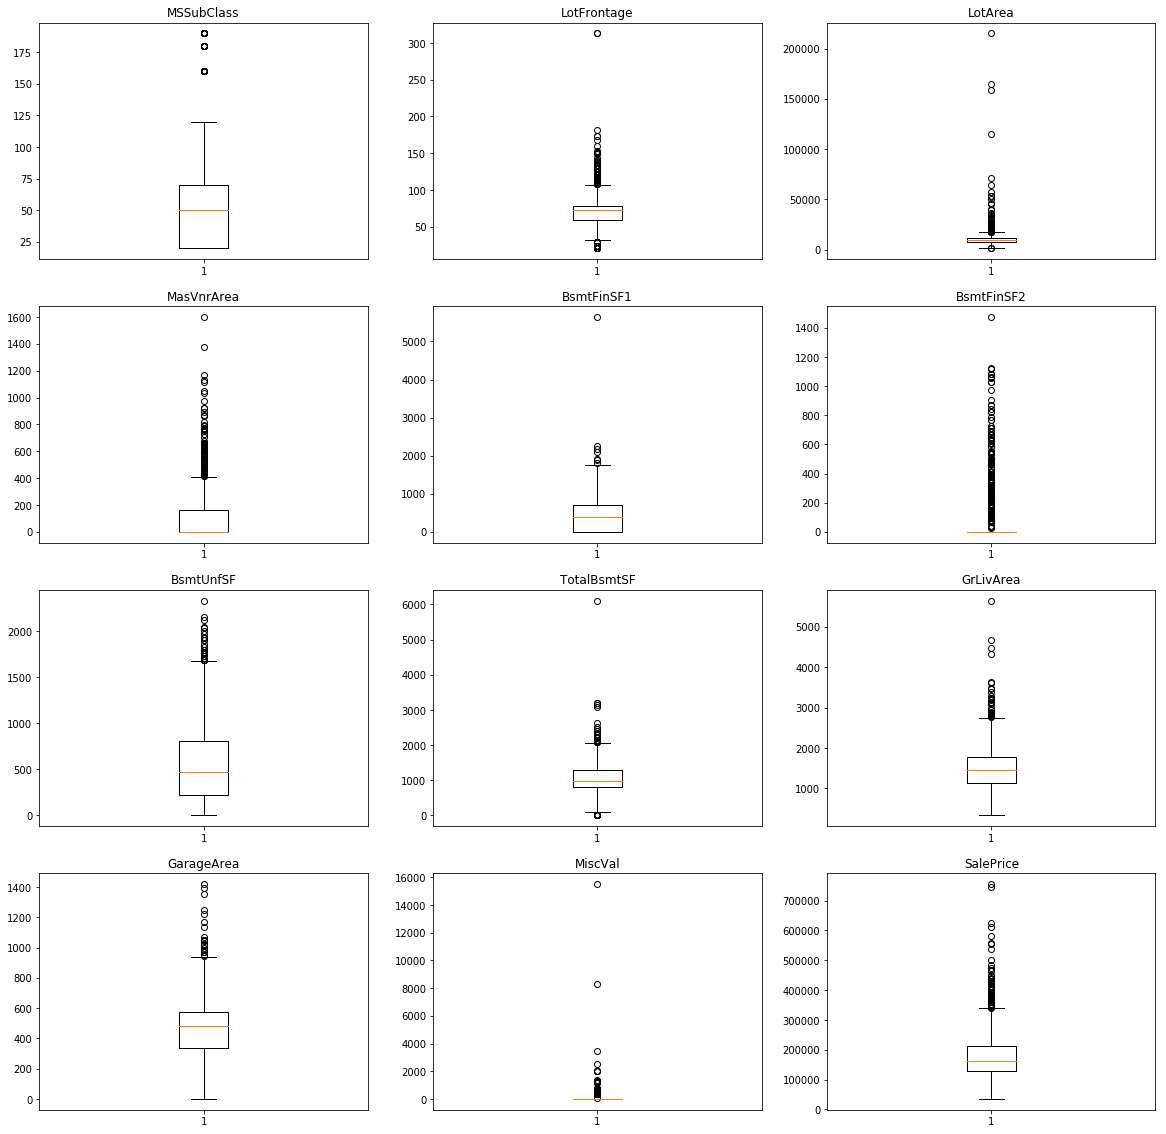

In [79]:
plt.figure(figsize=(20,20))
plt.subplot(4,3,1)
plt.boxplot(train['MSSubClass'])
plt.title('MSSubClass')

plt.subplot(4,3,2)
plt.boxplot(train['LotFrontage'])
plt.title('LotFrontage')

plt.subplot(4,3,3)
plt.boxplot(train['LotArea'])
plt.title('LotArea')

plt.subplot(4,3,4)
plt.boxplot(train['MasVnrArea'])
plt.title('MasVnrArea')

plt.subplot(4,3,5)
plt.boxplot(train['BsmtFinSF1'])
plt.title('BsmtFinSF1')

plt.subplot(4,3,6)
plt.boxplot(train['BsmtFinSF2'])
plt.title('BsmtFinSF2')

plt.subplot(4,3,7)
plt.boxplot(train['BsmtUnfSF'])
plt.title('BsmtUnfSF')

plt.subplot(4,3,8)
plt.boxplot(train['TotalBsmtSF'])
plt.title('TotalBsmtSF')

plt.subplot(4,3,9)
plt.boxplot(train['GrLivArea'])
plt.title('GrLivArea')

plt.subplot(4,3,10)
plt.boxplot(train['GarageArea'])
plt.title('GarageArea')

plt.subplot(4,3,11)
plt.boxplot(train['MiscVal'])
plt.title('MiscVal')

plt.subplot(4,3,12)
plt.boxplot(train['SalePrice'])
plt.title('SalePrice')

We see that there are numerical variables that have outliers that need treatment. However, it is important to understand that ommiting a datapoint from the data just based on 1 variable may not be advisable as we may be losing relevant information from the other variables. <br><br>
Instead of removing outliers, let's **cap outliers** at the 99th percentile of the numeric variable to ensure we're dealing with abnormally high values, but still ensuring we're not losing relevant information from the data by removing those datapoints

In [80]:
train.loc[(train['MiscVal']>train['MiscVal'].quantile(0.99)),'MiscVal']=train['MiscVal'].quantile(0.99)
train.loc[(train['LotFrontage']>train['LotFrontage'].quantile(0.99)),'LotFrontage']=train['LotFrontage'].quantile(0.99)
train.loc[(train['LotArea']>train['LotArea'].quantile(0.99)),'LotArea']=train['LotArea'].quantile(0.99)
train.loc[(train['MasVnrArea']>train['MasVnrArea'].quantile(0.99)),'MasVnrArea']=train['MasVnrArea'].quantile(0.99)
train.loc[(train['BsmtFinSF2']>train['BsmtFinSF2'].quantile(0.99)),'BsmtFinSF2']=train['BsmtFinSF2'].quantile(0.99)
train.loc[(train['BsmtUnfSF']>train['BsmtUnfSF'].quantile(0.99)),'BsmtUnfSF']=train['BsmtUnfSF'].quantile(0.99)
train.loc[(train['BsmtFinSF1']>train['BsmtFinSF1'].quantile(0.99)),'BsmtFinSF1']=train['BsmtFinSF1'].quantile(0.99)
train.loc[(train['TotalBsmtSF']>train['TotalBsmtSF'].quantile(0.99)),'TotalBsmtSF']=train['TotalBsmtSF'].quantile(0.99)
train.loc[(train['GrLivArea']>train['GrLivArea'].quantile(0.99)),'GrLivArea']=train['GrLivArea'].quantile(0.99)
train.loc[(train['GarageArea']>train['GarageArea'].quantile(0.99)),'GarageArea']=train['GarageArea'].quantile(0.99)

#train = train.drop(outlier_index)

**Let's visualize the distribution of the numeric variables** using scatter plots to identify potential patterns

<Figure size 720x720 with 0 Axes>

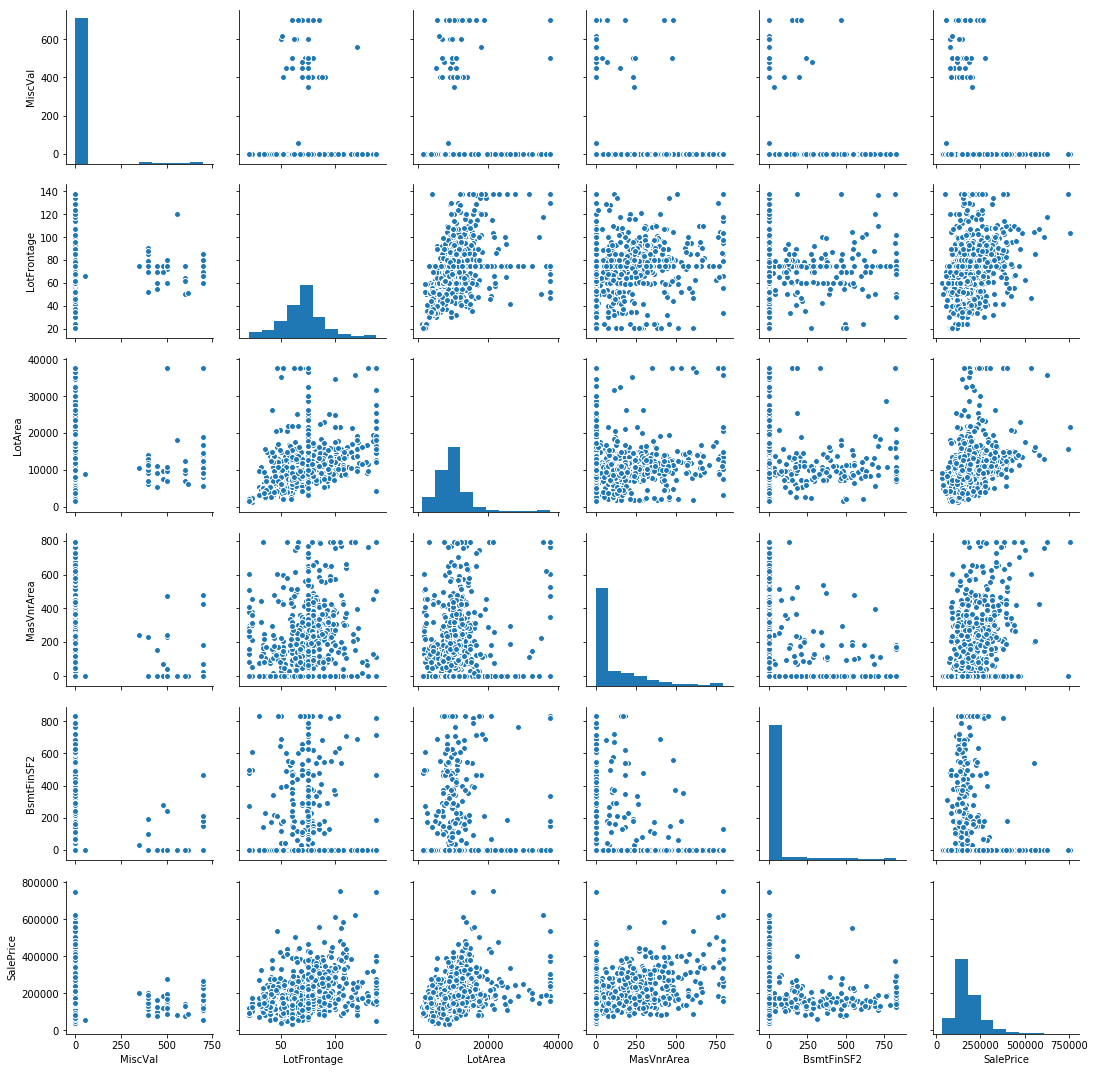

In [81]:
plt.figure(figsize=(10,10))
sns.pairplot(train[['MiscVal', 'LotFrontage', 'LotArea', 'MasVnrArea', 'BsmtFinSF2', 'SalePrice']])
plt.show()

#### Let's visualize the categorical variables

In [82]:
train.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,...,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice,GarageAge,HouseAge,RemodelAge
0,1,60,RL,65.0,8450.0,Pave,4,Lvl,AllPub,Inside,...,0,0.0,2,2008,WD,Normal,208500,5.0,5,5
1,2,20,RL,80.0,9600.0,Pave,4,Lvl,AllPub,FR2,...,0,0.0,5,2007,WD,Normal,181500,31.0,31,31
2,3,60,RL,68.0,11250.0,Pave,3,Lvl,AllPub,Inside,...,0,0.0,9,2008,WD,Normal,223500,7.0,7,6
3,4,70,RL,60.0,9550.0,Pave,3,Lvl,AllPub,Corner,...,0,0.0,2,2006,WD,Abnorml,140000,8.0,91,36
4,5,60,RL,84.0,14260.0,Pave,3,Lvl,AllPub,FR2,...,0,0.0,12,2008,WD,Normal,250000,8.0,8,8


Let's try and understand the kind of impact that categorical variables are having on the price of the houses

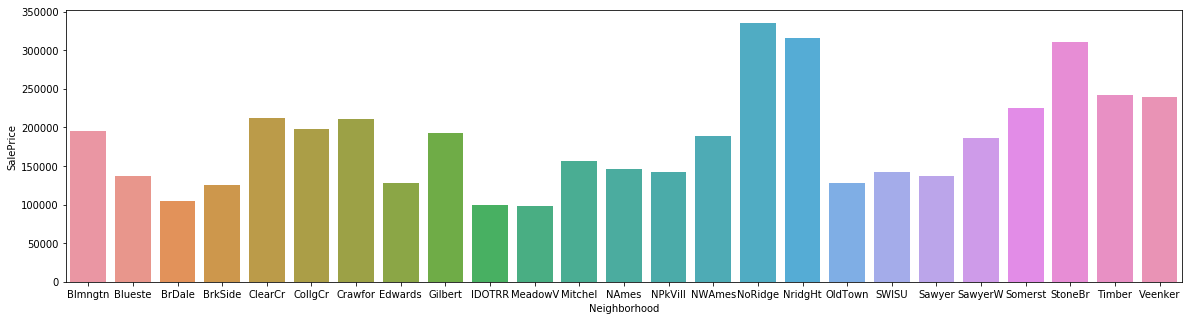

In [83]:
by_neighborhood = pd.DataFrame(train.groupby('Neighborhood')['SalePrice'].mean())
by_neighborhood['Neighborhood'] = by_neighborhood.index

plt.figure(figsize=(20,5))
sns.barplot(x=by_neighborhood['Neighborhood'], y=by_neighborhood['SalePrice'])

We observe that the average house price varies significantly based on different neighborhoods looking at the above analysis. The Houses near Northridge are the most expensive ones

Looking at the **style of dwellings** on how they impact the house prices

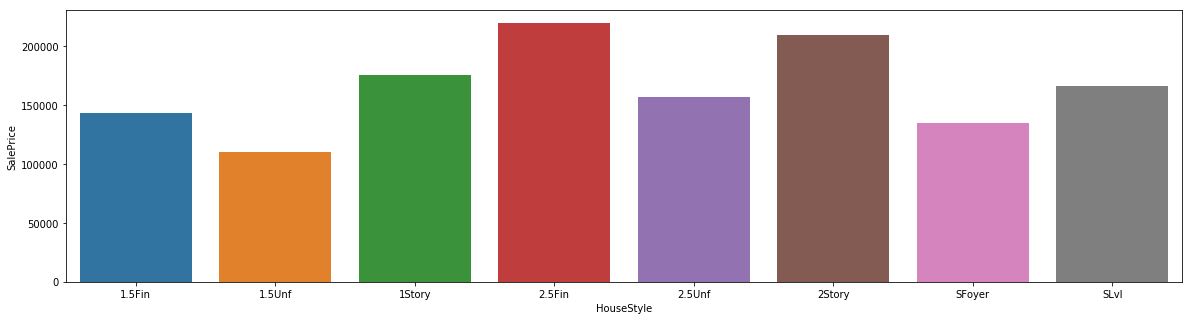

In [84]:
by_HouseStyle = pd.DataFrame(train.groupby('HouseStyle')['SalePrice'].mean())
by_HouseStyle['HouseStyle'] = by_HouseStyle.index

plt.figure(figsize=(20,5))
sns.barplot(x=by_HouseStyle['HouseStyle'], y=by_HouseStyle['SalePrice'])

The style of dwelling also seems to have an evident effect on the house prices. The 2 story and 2 and one-half story houses are clearly more expensive than the other house styles

Looking at the various categorical variables, we come to realize that the distribution of the categories withing the variables in some cases is skewed massively. This imbalance in the variables would need to be treated, and hence let's go ahead and **drop variables that are showing major imbalance in the distribution of categories**

In [85]:
#For all the categorical values, let's have a look at how many levels exist within each of them
cat_var = ['MSSubClass','MSZoning','Street','LotShape','LandContour','Utilities','LotConfig','LandSlope',
           'Neighborhood','Condition1','Condition2','BldgType','HouseStyle','OverallQual','OverallCond','RoofStyle',
          'RoofMatl','Exterior1st','Exterior2nd','MasVnrType','ExterQual','ExterCond','Foundation','BsmtQual',
          'BsmtCond','BsmtExposure','BsmtFinType1','BsmtFinType2','Heating','HeatingQC','CentralAir','Electrical',
          'KitchenQual','Functional','FireplaceQu','GarageType','GarageFinish','GarageQual','GarageCond','PavedDrive',
          'SaleType','SaleCondition']
for i in range (len(cat_var)):
    print(train[cat_var[i]].value_counts())

20     536
60     299
50     144
120     87
30      69
160     63
70      60
80      58
90      52
190     30
85      20
75      16
45      12
180     10
40       4
Name: MSSubClass, dtype: int64
RL         1151
RM          218
FV           65
RH           16
C (all)      10
Name: MSZoning, dtype: int64
Pave    1454
Grvl       6
Name: Street, dtype: int64
4    925
3    484
2     41
1     10
Name: LotShape, dtype: int64
Lvl    1311
Bnk      63
HLS      50
Low      36
Name: LandContour, dtype: int64
AllPub    1459
NoSeWa       1
Name: Utilities, dtype: int64
Inside     1052
Corner      263
CulDSac      94
FR2          47
FR3           4
Name: LotConfig, dtype: int64
3    1382
2      65
1      13
Name: LandSlope, dtype: int64
NAmes      225
CollgCr    150
OldTown    113
Edwards    100
Somerst     86
Gilbert     79
NridgHt     77
Sawyer      74
NWAmes      73
SawyerW     59
BrkSide     58
Crawfor     51
Mitchel     49
NoRidge     41
Timber      38
IDOTRR      37
ClearCr     28
SWISU       

Looking at the above split of levels in the columns, we see that there is a **significant variable imbalance** in the following columns: Street, Utilities. We can go ahead and drop these 2 columns as they are not explaining major variance

In [86]:
train.drop(columns=['Street','Utilities'], inplace=True)

### Converting categorical variables to dummy variables

Having see that there are certain categories within the variables that seem to contributing significantly to the house prices - let us now go ahead and look at the categorical variables to convert them to dummy variables. We have already converted a few of these categorical variables to numerical during the part of missing value treatment, let's do this for all the remaining variables

In [87]:
# The MSSubClass variable
MSSubClass_levels = pd.get_dummies(train['MSSubClass'], drop_first=True)
MSSubClass_levels.columns = ['MSSC30', 'MSSC40', 'MSSC45','MSSC50', 'MSSC60', 'MSSC70', 'MSSC75', 'MSSC80', 'MSSC85',
                            'MSSC90','MSSC120','MSSC160','MSSC180','MSSC190']
train = pd.concat([train, MSSubClass_levels], axis = 1)
train.drop(columns='MSSubClass', inplace = True)

In [88]:
# The MSZoning variable
MSZoning_levels = pd.get_dummies(train['MSZoning'], drop_first=True)
MSZoning_levels.columns = ['MSZFV','MSZRH','MSZRL','MSZRM']
train = pd.concat([train, MSZoning_levels], axis = 1)
train.drop(columns='MSZoning', inplace = True)

In [89]:
# The LotShape variable
LandContour_levels = pd.get_dummies(train['LandContour'], drop_first=True)
LandContour_levels.columns = ['LandContourHLS','LandContourLow','LandContourLvl']
train = pd.concat([train, LandContour_levels], axis = 1)
train.drop(columns='LandContour', inplace = True)

In [90]:
# The LotConfig variable
LotConfig_levels = pd.get_dummies(train['LotConfig'], drop_first=True)
LotConfig_levels.columns = ['LotConfigCuIDSac','LotConfigFR2','LotConfigFR3','LotConfigInside']
train = pd.concat([train, LotConfig_levels], axis = 1)
train.drop(columns='LotConfig', inplace = True)

In [91]:
# The Neighborhood variable
Neighborhood_levels = pd.get_dummies(train['Neighborhood'], drop_first=True)
Neighborhood_levels.columns = ['Nghbr_Blueste', 'Nghbr_BrDale', 'Nghbr_BrkSide', 'Nghbr_ClearCr', 'Nghbr_CollgCr', 
                               'Nghbr_Crawfor','Nghbr_Edwards', 'Nghbr_Gilbert', 'Nghbr_IDOTRR', 'Nghbr_MeadowV', 
                               'Nghbr_Mitchel', 'Nghbr_NAmes','Nghbr_NPkVill', 'Nghbr_NWAmes', 'Nghbr_NoRidge', 
                               'Nghbr_NridgHt', 'Nghbr_OldTown', 'Nghbr_SWISU', 'Nghbr_Sawyer','Nghbr_SawyerW', 
                               'Nghbr_Somerst', 'Nghbr_StoneBr', 'Nghbr_Timber', 'Nghbr_Veenker']
train = pd.concat([train, Neighborhood_levels], axis = 1)
train.drop(columns='Neighborhood', inplace = True)

In [92]:
# The Condition1 variable
Condition1_levels = pd.get_dummies(train['Condition1'], drop_first=True)
Condition1_levels.columns = ['Cond1Feedr', 'Cond1Norm', 'Cond1PosA', 'Cond1PosN', 'Cond1RRAe', 'Cond1RRAn', 'Cond1RRNe', 
                             'Cond1RRNn']
train = pd.concat([train, Condition1_levels], axis = 1)
train.drop(columns='Condition1', inplace = True)

In [93]:
# The Condition2 variable
Condition2_levels = pd.get_dummies(train['Condition2'], drop_first=True)
Condition2_levels.columns = ['Cond2Feedr', 'Cond2Norm', 'Cond2PosA', 'Cond2PosN', 'Cond2RRAe', 'Cond2RRAn', 'Cond2RRNn']
train = pd.concat([train, Condition2_levels], axis = 1)
train.drop(columns='Condition2', inplace = True)

In [94]:
# The BldgType variable
BldgType_levels = pd.get_dummies(train['BldgType'], drop_first=True)
BldgType_levels.columns = ['BldgType_2fmCon', 'BldgType_Duplex', 'BldgType_Twnhs', 'BldgType_TwnhsE']
train = pd.concat([train, BldgType_levels], axis = 1)
train.drop(columns='BldgType', inplace = True)

In [95]:
# The HouseStyle variable
HouseStyle_levels = pd.get_dummies(train['HouseStyle'], drop_first=True)
HouseStyle_levels.columns = ['HouseStyle1.5Unf', 'HouseStyle1Story', 'HouseStyle2.5Fin', 'HouseStyle2.5Unf', 
                             'HouseStyle2Story', 'HouseStyleSFoyer', 'HouseStyleSLvl']
train = pd.concat([train, HouseStyle_levels], axis = 1)
train.drop(columns='HouseStyle', inplace = True)

In [96]:
# The RoofStyle variable
RoofStyle_levels = pd.get_dummies(train['RoofStyle'], drop_first=True)
RoofStyle_levels.columns = ['RoofStyleGable', 'RoofStyleGambrel', 'RoofStyleHip', 'RoofStyleMansard', 'RoofStyleShed']
train = pd.concat([train, RoofStyle_levels], axis = 1)
train.drop(columns='RoofStyle', inplace = True)

In [97]:
# The RoofMatl variable
RoofMatl_levels = pd.get_dummies(train['RoofMatl'], drop_first=True)
RoofMatl_levels.columns = ['RoofMatlCompShg', 'RoofMatlMembran', 'RoofMatlMetal', 'RoofMatlRoll', 'RoofMatlTar&Grv', 
                           'RoofMatlWdShake', 'RoofMatlWdShngl']
train = pd.concat([train, RoofMatl_levels], axis = 1)
train.drop(columns='RoofMatl', inplace = True)

In [98]:
# The Exterior1st variable
Exterior1st_levels = pd.get_dummies(train['Exterior1st'], drop_first=True)
Exterior1st_levels.columns = ['Ext1AsphShn', 'Ext1BrkComm', 'Ext1BrkFace', 'Ext1CBlock', 'Ext1CemntBd', 'Ext1HdBoard',
       'Ext1ImStucc', 'Ext1MetalSd', 'Ext1Plywood', 'Ext1Stone', 'Ext1Stucco', 'Ext1VinylSd', 'Ext1WdSdng', 'Ext1WdShing']
train = pd.concat([train, Exterior1st_levels], axis = 1)
train.drop(columns='Exterior1st', inplace = True)

In [99]:
# The Exterior2nd variable
Exterior2nd_levels = pd.get_dummies(train['Exterior2nd'], drop_first=True)
Exterior2nd_levels.columns = ['Ext2AsphShn', 'Ext2BrkCmn', 'Ext2BrkFace', 'Ext2CBlock', 'Ext2CmentBd', 'Ext2HdBoard',
       'Ext2ImStucc', 'Ext2MetalSd', 'Ext2Other', 'Ext2Plywood', 'Ext2Stone', 'Ext2Stucco', 'Ext2VinylSd',
       'Ext2WdSdng', 'Ext2WdShng']
train = pd.concat([train, Exterior2nd_levels], axis = 1)
train.drop(columns='Exterior2nd', inplace = True)

In [100]:
# The MasVnrType variable
MasVnrType_levels = pd.get_dummies(train['MasVnrType'], drop_first=True)
MasVnrType_levels.columns = ['MasVnrType_BrkFace', 'MasVnrType_None', 'MasVnrType_Stone']
train = pd.concat([train, MasVnrType_levels], axis = 1)
train.drop(columns='MasVnrType', inplace = True)

In [101]:
# The Foundation variable
Foundation_levels = pd.get_dummies(train['Foundation'], drop_first=True)
Foundation_levels.columns = ['FoundationCBlock', 'FoundationPConc', 'FoundationSlab', 'FoundationStone', 'FoundationWood']
train = pd.concat([train, Foundation_levels], axis = 1)
train.drop(columns='Foundation', inplace = True)

In [102]:
# The Heating variable
Heating_levels = pd.get_dummies(train['Heating'], drop_first=True)
Heating_levels.columns = ['HeatingGasA', 'HeatingGasW', 'HeatingGrav', 'HeatingOthW', 'HeatingWall']
train = pd.concat([train, Heating_levels], axis = 1)
train.drop(columns='Heating', inplace = True)

In [103]:
# The Electrical variable
Electrical_levels = pd.get_dummies(train['Electrical'], drop_first=True)
Electrical_levels.columns = ['ElectricalFuseF', 'ElectricalFuseP', 'ElectricalMix', 'ElectricalSBrkr']
train = pd.concat([train, Electrical_levels], axis = 1)
train.drop(columns='Electrical', inplace = True)

In [104]:
# The Functional variable
Functional_levels = pd.get_dummies(train['Functional'], drop_first=True)
Functional_levels.columns = ['Func_Maj2', 'Func_Min1', 'Func_Min2', 'Func_Mod', 'Func_Sev', 'Func_Typ']
train = pd.concat([train, Functional_levels], axis = 1)
train.drop(columns='Functional', inplace = True)

In [105]:
# The GarageType variable
GarageType_levels = pd.get_dummies(train['GarageType'], drop_first=True)
GarageType_levels.columns = ['GarageTypeAttchd', 'GarageTypeBasment', 'GarageTypeBuiltIn', 'GarageTypeCarPort', 
                             'GarageTypeDetchd', 'GarageTypeNoGarage']
train = pd.concat([train, GarageType_levels], axis = 1)
train.drop(columns='GarageType', inplace = True)

In [106]:
# The PavedDrive variable
PavedDrive_levels = pd.get_dummies(train['PavedDrive'], drop_first=True)
PavedDrive_levels.columns = ['PavedDrive_P', 'PavedDrive_Y']
train = pd.concat([train, PavedDrive_levels], axis = 1)
train.drop(columns='PavedDrive', inplace = True)

In [107]:
# The SaleType variable
SaleType_levels = pd.get_dummies(train['SaleType'], drop_first=True)
SaleType_levels.columns = ['SaleTypeCWD', 'SaleTypeCon', 'SaleTypeConLD', 'SaleTypeConLI', 'SaleTypeConLw', 
                           'SaleTypeNew', 'SaleTypeOth', 'SaleTypeWD']
train = pd.concat([train, SaleType_levels], axis = 1)
train.drop(columns='SaleType', inplace = True)

In [108]:
# The SaleCondition variable
SaleCondition_levels = pd.get_dummies(train['SaleCondition'], drop_first=True)
SaleCondition_levels.columns = ['SaleCond_AdjLand', 'SaleCond_Alloca', 'SaleCond_Family', 'SaleCond_Normal', 
                                'SaleCond_Partial']
train = pd.concat([train, SaleCondition_levels], axis = 1)
train.drop(columns='SaleCondition', inplace = True)

In [109]:
list(train.dtypes[:])

[dtype('int64'),
 dtype('float64'),
 dtype('float64'),
 dtype('int64'),
 dtype('int64'),
 dtype('int64'),
 dtype('int64'),
 dtype('float64'),
 dtype('int64'),
 dtype('int64'),
 dtype('int64'),
 dtype('int64'),
 dtype('int64'),
 dtype('int64'),
 dtype('float64'),
 dtype('int64'),
 dtype('float64'),
 dtype('float64'),
 dtype('float64'),
 dtype('int64'),
 dtype('int64'),
 dtype('int64'),
 dtype('int64'),
 dtype('int64'),
 dtype('float64'),
 dtype('int64'),
 dtype('int64'),
 dtype('int64'),
 dtype('int64'),
 dtype('int64'),
 dtype('int64'),
 dtype('int64'),
 dtype('int64'),
 dtype('int64'),
 dtype('int64'),
 dtype('int64'),
 dtype('int64'),
 dtype('float64'),
 dtype('int64'),
 dtype('int64'),
 dtype('int64'),
 dtype('int64'),
 dtype('int64'),
 dtype('int64'),
 dtype('int64'),
 dtype('int64'),
 dtype('float64'),
 dtype('int64'),
 dtype('int64'),
 dtype('int64'),
 dtype('float64'),
 dtype('int64'),
 dtype('int64'),
 dtype('uint8'),
 dtype('uint8'),
 dtype('uint8'),
 dtype('uint8'),
 dtype('u

Now that we have converted all the categorical variables to numerical variables, let's go ahead with the modelling process.

In [110]:
train.head()

,Id,LotFrontage,LotArea,LotShape,LandSlope,OverallQual,OverallCond,MasVnrArea,ExterQual,ExterCond,...,SaleTypeConLI,SaleTypeConLw,SaleTypeNew,SaleTypeOth,SaleTypeWD,SaleCond_AdjLand,SaleCond_Alloca,SaleCond_Family,SaleCond_Normal,SaleCond_Partial
0,1,65.0,8450.0,4,3,7,5,196.0,4,3,...,0,0,0,0,1,0,0,0,1,0
1,2,80.0,9600.0,4,3,6,8,0.0,3,3,...,0,0,0,0,1,0,0,0,1,0
2,3,68.0,11250.0,3,3,7,5,162.0,4,3,...,0,0,0,0,1,0,0,0,1,0
3,4,60.0,9550.0,3,3,7,5,0.0,3,3,...,0,0,0,0,1,0,0,0,0,0
4,5,84.0,14260.0,3,3,8,5,350.0,4,3,...,0,0,0,0,1,0,0,0,1,0


Before that, let's look at the **distribution of the dependent variable**

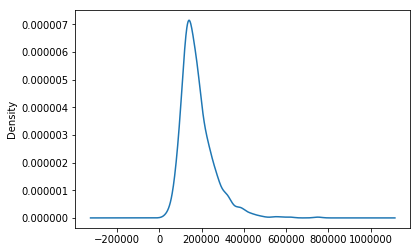

In [111]:
train.SalePrice.plot(kind='kde')

We observe that the target variable is normally distributed with some skew towards the left.

Now that we're done with the data preparation and visualization - where we've ensured that we dont have any missing values in the data, the outliers have been treated, the categorical variables have been encoded, and the irrelevant variables gotten rid of, we can proceed with our modelling

### Test-Train Split

In [112]:
from sklearn.model_selection import train_test_split

In [113]:
# Putting feature variable to X
X = train.drop(['SalePrice'], axis=1)
y = train['SalePrice']

In [114]:
# Splitting the data into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, test_size=0.3, random_state=100)

### Feature Scaling

In [115]:
from sklearn.preprocessing import MinMaxScaler

In [116]:
#Using minmax scaler to bring the data between 0 and 1
scaler = MinMaxScaler()

# Apply scaler() to all the columns except the 'dummy variables variables
X_train[['LotFrontage','LotArea','LotShape','LandSlope','OverallQual','OverallCond','MasVnrArea','ExterQual','ExterCond',
         'BsmtQual','BsmtCond','BsmtExposure','BsmtFinType1','BsmtFinSF1','BsmtFinType2','BsmtFinSF2','BsmtUnfSF',
         'TotalBsmtSF','HeatingQC','CentralAir','1stFlrSF','2ndFlrSF','LowQualFinSF','GrLivArea','BsmtFullBath',
         'BsmtHalfBath','FullBath','HalfBath','BedroomAbvGr','KitchenAbvGr','KitchenQual','TotRmsAbvGrd','Fireplaces',
         'FireplaceQu','GarageFinish','GarageCars','GarageArea','GarageQual','GarageCond','WoodDeckSF','OpenPorchSF',
         'EnclosedPorch','3SsnPorch','ScreenPorch','PoolArea','MiscVal','MoSold','YrSold','GarageAge',
         'HouseAge','RemodelAge']] = scaler.fit_transform(X_train[['LotFrontage','LotArea','LotShape','LandSlope','OverallQual','OverallCond','MasVnrArea','ExterQual','ExterCond',
         'BsmtQual','BsmtCond','BsmtExposure','BsmtFinType1','BsmtFinSF1','BsmtFinType2','BsmtFinSF2','BsmtUnfSF',
         'TotalBsmtSF','HeatingQC','CentralAir','1stFlrSF','2ndFlrSF','LowQualFinSF','GrLivArea','BsmtFullBath',
         'BsmtHalfBath','FullBath','HalfBath','BedroomAbvGr','KitchenAbvGr','KitchenQual','TotRmsAbvGrd','Fireplaces',
         'FireplaceQu','GarageFinish','GarageCars','GarageArea','GarageQual','GarageCond','WoodDeckSF','OpenPorchSF',
         'EnclosedPorch','3SsnPorch','ScreenPorch','PoolArea','MiscVal','MoSold','YrSold','GarageAge',
         'HouseAge','RemodelAge']])
X_train.head()

C:\Users\vyom\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
C:\Users\vyom\AppData\Local\Continuum\anaconda3\lib\site-packages\pandas\core\indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


,Id,LotFrontage,LotArea,LotShape,LandSlope,OverallQual,OverallCond,MasVnrArea,ExterQual,ExterCond,...,SaleTypeConLI,SaleTypeConLw,SaleTypeNew,SaleTypeOth,SaleTypeWD,SaleCond_AdjLand,SaleCond_Alloca,SaleCond_Family,SaleCond_Normal,SaleCond_Partial
210,211,0.395155,0.114351,1.0,1.0,0.444444,0.625,0.000000,0.333333,0.333333,...,0,0,0,0,1,0,0,0,1,0
318,319,0.592733,0.233385,1.0,0.5,0.666667,0.500,0.323526,0.666667,0.333333,...,0,0,0,0,1,0,0,0,1,0
239,240,0.266300,0.201271,1.0,1.0,0.555556,0.375,0.000000,0.333333,0.333333,...,0,0,0,0,1,0,0,0,1,0
986,987,0.326432,0.106205,1.0,1.0,0.555556,0.875,0.000000,0.333333,0.666667,...,0,0,0,0,1,0,0,0,1,0
1416,1417,0.335023,0.273284,1.0,1.0,0.333333,0.625,0.000000,0.333333,0.333333,...,0,0,0,0,1,0,0,0,1,0


### Model Building

Let's run our very first logistic regression model using statsmodels.api on the entire dataset as it is to see the performance

In [117]:
import statsmodels.api as sm

# Add a constant
X_train_lm = sm.add_constant(X_train)

# Create a first fitted model
lr = sm.OLS(y_train, X_train_lm).fit()

In [118]:
# Check the summary
print(lr.summary())

                            OLS Regression Results                            
Dep. Variable:              SalePrice   R-squared:                       0.946
Model:                            OLS   Adj. R-squared:                  0.932
Method:                 Least Squares   F-statistic:                     69.14
Date:                Mon, 08 Jul 2019   Prob (F-statistic):               0.00
Time:                        16:43:10   Log-Likelihood:                -11477.
No. Observations:                1021   AIC:                         2.337e+04
Df Residuals:                     815   BIC:                         2.438e+04
Df Model:                         205                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
const              -1.066e+06    6.5

Looking at all the variables in our train data, we are able to build a model with an R-Squared value of over 0.9

Considering we're dealing with a really large set of data, it wouldn't be feasible of treating them 1 at a time. In that case, we'll opt for **Recursive Feature Elimination** To come down to about a smaller number of variables that explain the highest variance in the data and exhibit the least multicollinearity. Post that, we'll go into fine-tuning the model manually to end up with the final set of variables

In [119]:
# Importing RFE and LinearRegression
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression

In [120]:
lm = LinearRegression()
lm.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

Let's try using the recursive feature elimination based on mean squared error to identify the optimal number of features that we should huse in our model

In [121]:
from sklearn.feature_selection import RFECV

# Create recursive feature eliminator that scores features by mean squared errors
rfecv = RFECV(estimator=lm, step=1, scoring='neg_mean_squared_error', cv=3)

# Fit recursive feature eliminator 
rfecv.fit(X_train, y_train)
print('Optimal number of features :', rfecv.n_features_)
print('Best features :', X_train.columns[rfecv.support_])

Optimal number of features : 50
Best features : Index(['LotArea', 'OverallQual', 'OverallCond', 'ExterQual', 'BsmtCond',
       'BsmtExposure', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', '1stFlrSF',
       '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BedroomAbvGr', 'KitchenAbvGr',
       'TotRmsAbvGrd', 'HouseAge', 'MSSC120', 'MSSC160', 'Nghbr_Blueste',
       'Nghbr_Crawfor', 'Nghbr_NPkVill', 'Nghbr_NoRidge', 'Nghbr_NridgHt',
       'Nghbr_Somerst', 'Nghbr_StoneBr', 'Cond1RRAe', 'Cond2PosA', 'Cond2PosN',
       'Cond2RRAe', 'HouseStyle2.5Fin', 'RoofMatlCompShg', 'RoofMatlMembran',
       'RoofMatlMetal', 'RoofMatlRoll', 'RoofMatlTar&Grv', 'RoofMatlWdShake',
       'RoofMatlWdShngl', 'Ext1AsphShn', 'Ext1BrkFace', 'Ext1CBlock',
       'Ext1CemntBd', 'Ext2AsphShn', 'Ext2CmentBd', 'HeatingOthW', 'Func_Mod',
       'Func_Sev', 'SaleTypeCon', 'SaleTypeNew', 'SaleCond_Partial'],
      dtype='object')


The output of the scorer tells us that the optimal number of features that we should consider are 50.
Let us take a upper bound of 40 variables and then later fine-tune the model using other features such as the VIF, P-values and adjusted R-squared to identify the final set of variables

In [122]:
# running RFE
rfe = RFE(lm, 40)
rfe = rfe.fit(X_train, y_train)

In [123]:
zip(X_train.columns,rfe.support_,rfe.ranking_)

In [124]:
# Identify all the top 40 columns that were returned by our RFE model
col = X_train.columns[rfe.support_]
col

Index(['LotArea', 'OverallQual', 'OverallCond', 'ExterQual', 'BsmtCond',
       'BsmtExposure', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', '1stFlrSF',
       '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BedroomAbvGr', 'KitchenAbvGr',
       'TotRmsAbvGrd', 'HouseAge', 'Nghbr_Crawfor', 'Nghbr_NoRidge',
       'Nghbr_NridgHt', 'Nghbr_StoneBr', 'Cond1RRAe', 'Cond2PosA', 'Cond2PosN',
       'Cond2RRAe', 'HouseStyle2.5Fin', 'RoofMatlCompShg', 'RoofMatlMembran',
       'RoofMatlMetal', 'RoofMatlRoll', 'RoofMatlTar&Grv', 'RoofMatlWdShake',
       'RoofMatlWdShngl', 'Ext1CemntBd', 'Ext2CmentBd', 'HeatingOthW',
       'Func_Mod', 'Func_Sev', 'SaleTypeCon', 'SaleCond_Partial'],
      dtype='object')

In [125]:
# Identify all the top 40 columns that were returned by our RFE model
col = ['LotArea', 'OverallQual', 'OverallCond', 'ExterQual', 'BsmtCond',
       'BsmtExposure', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', '1stFlrSF',
       '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BedroomAbvGr', 'KitchenAbvGr',
       'TotRmsAbvGrd', 'HouseAge', 'Nghbr_Crawfor', 'Nghbr_NoRidge',
       'Nghbr_NridgHt', 'Nghbr_StoneBr', 'Cond1RRAe', 'Cond2PosA', 'Cond2PosN',
       'Cond2RRAe', 'HouseStyle2.5Fin', 'RoofMatlCompShg', 'RoofMatlMembran',
       'RoofMatlMetal', 'RoofMatlRoll', 'RoofMatlTar&Grv', 'RoofMatlWdShake',
       'RoofMatlWdShngl', 'Ext1CemntBd', 'Ext2CmentBd', 'HeatingOthW',
       'Func_Mod', 'Func_Sev', 'SaleTypeCon', 'SaleCond_Partial']

Let's now have a look at the **Correlation matrix** for the set of 40 variables that we're left with post RFE

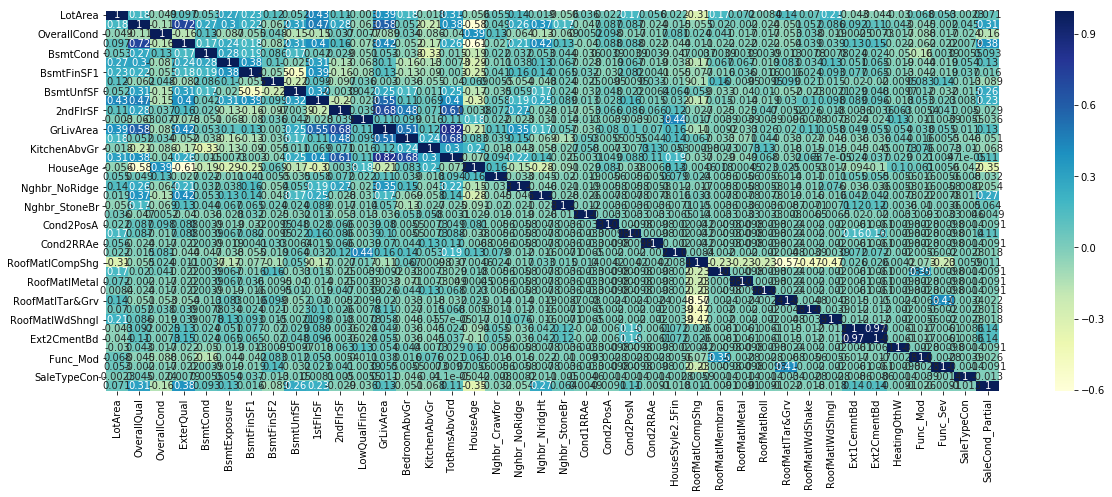

In [126]:
plt.figure(figsize = (20, 7))
sns.heatmap(X_train[col].corr(), annot = True, cmap="YlGnBu")
plt.show()

There are too many variables and hence just looking at the correlation matrix is not visible looking at it on the whole

**Build the model using statsmodel.api based on the final set of features identified post RFE and strong-correlation treatment**

In [127]:
# Creating X_test dataframe with RFE selected variables
X_train_rfe = X_train[col]

In [128]:
# Adding a constant variable 
import statsmodels.api as sm  
X_train_rfe = sm.add_constant(X_train_rfe)
lm = sm.OLS(y_train,X_train_rfe).fit()   # Running the linear model

In [129]:
#Let's see the summary of our linear model
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:              SalePrice   R-squared:                       0.919
Model:                            OLS   Adj. R-squared:                  0.916
Method:                 Least Squares   F-statistic:                     279.4
Date:                Mon, 08 Jul 2019   Prob (F-statistic):               0.00
Time:                        16:43:22   Log-Likelihood:                -11678.
No. Observations:                1021   AIC:                         2.344e+04
Df Residuals:                     980   BIC:                         2.364e+04
Df Model:                          40                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const            -9.605e+05   4.26e+04  

We observe that post RFE, after reducing the number of variables to 35, we're able to create a model that still explains enough variance in the data with an R-Squared value of over 0.9

However, we see that there are variables that are insignificant on observing the p-value. Let's fine-tune the model by eliminating one variable at a time and evaluate the significance of the model parameters based on the corresponding p-values and VIF 

*Cond2PosA* variable is insignificant and can be dropped

In [130]:
# Dropping highly correlated variables and insignificant variables
X_train_rfe = X_train_rfe.drop('Cond2PosA', axis=1)

# Build a second fitted model
X_train_rfe = sm.add_constant(X_train_rfe)
lm = sm.OLS(y_train, X_train_rfe).fit()

# Print the summary of the model
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:              SalePrice   R-squared:                       0.919
Model:                            OLS   Adj. R-squared:                  0.916
Method:                 Least Squares   F-statistic:                     286.7
Date:                Mon, 08 Jul 2019   Prob (F-statistic):               0.00
Time:                        16:43:22   Log-Likelihood:                -11678.
No. Observations:                1021   AIC:                         2.344e+04
Df Residuals:                     981   BIC:                         2.363e+04
Df Model:                          39                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const             -9.61e+05   4.25e+04  

In [131]:
# Calculate the VIFs for the new model
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
vif['Features'] = X_train_rfe.columns
vif['VIF'] = [variance_inflation_factor(X_train.values, i) for i in range(X_train_rfe.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False).reset_index(drop=True)
vif

,Features,VIF
0,Cond2RRAe,604.43
1,SaleCond_Partial,441.64
2,Nghbr_Crawfor,421.12
3,SaleTypeCon,412.63
4,Nghbr_StoneBr,337.95
5,HouseAge,149.21
6,Cond1RRAe,125.78
7,ExterQual,122.30
8,2ndFlrSF,115.08
9,BedroomAbvGr,110.22


*Cond2RRAe* variable has a very high VIF and can be dropped

In [132]:
# Dropping highly correlated variables and insignificant variables
X_train_rfe = X_train_rfe.drop('Cond2RRAe', 1)

# Build a second fitted model
X_train_rfe = sm.add_constant(X_train_rfe)
lm = sm.OLS(y_train, X_train_rfe).fit()

# Print the summary of the model
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:              SalePrice   R-squared:                       0.919
Model:                            OLS   Adj. R-squared:                  0.916
Method:                 Least Squares   F-statistic:                     293.8
Date:                Mon, 08 Jul 2019   Prob (F-statistic):               0.00
Time:                        16:43:25   Log-Likelihood:                -11679.
No. Observations:                1021   AIC:                         2.344e+04
Df Residuals:                     982   BIC:                         2.363e+04
Df Model:                          38                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const            -9.616e+05   4.26e+04  

In [133]:
# Calculate the VIFs for the new model
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
vif['Features'] = X_train_rfe.columns
vif['VIF'] = [variance_inflation_factor(X_train.values, i) for i in range(X_train_rfe.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False).reset_index(drop=True)
vif

,Features,VIF
0,HouseStyle2.5Fin,604.43
1,Nghbr_Crawfor,421.12
2,SaleCond_Partial,412.63
3,Nghbr_StoneBr,337.95
4,HouseAge,149.21
5,Cond1RRAe,125.78
6,ExterQual,122.30
7,2ndFlrSF,115.08
8,BedroomAbvGr,110.22
9,1stFlrSF,106.21


*HouseStyle2.5Fin* variable has high VIF and can be dropped

In [134]:
# Dropping highly correlated variables and insignificant variables
X_train_rfe = X_train_rfe.drop('HouseStyle2.5Fin', 1)

# Build a second fitted model
X_train_rfe = sm.add_constant(X_train_rfe)
lm = sm.OLS(y_train, X_train_rfe).fit()

# Print the summary of the model
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:              SalePrice   R-squared:                       0.918
Model:                            OLS   Adj. R-squared:                  0.915
Method:                 Least Squares   F-statistic:                     298.4
Date:                Mon, 08 Jul 2019   Prob (F-statistic):               0.00
Time:                        16:43:28   Log-Likelihood:                -11685.
No. Observations:                1021   AIC:                         2.345e+04
Df Residuals:                     983   BIC:                         2.363e+04
Df Model:                          37                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const            -9.444e+05   4.25e+04  

In [135]:
# Calculate the VIFs for the new model
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
vif['Features'] = X_train_rfe.columns
vif['VIF'] = [variance_inflation_factor(X_train.values, i) for i in range(X_train_rfe.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False).reset_index(drop=True)
vif

,Features,VIF
0,RoofMatlCompShg,604.43
1,Nghbr_Crawfor,421.12
2,Nghbr_StoneBr,337.95
3,HouseAge,149.21
4,Cond1RRAe,125.78
5,ExterQual,122.30
6,2ndFlrSF,115.08
7,BedroomAbvGr,110.22
8,1stFlrSF,106.21
9,BsmtCond,86.85


*RoofMatlCompShg* variable has high VIF and can be dropped

In [136]:
# Dropping highly correlated variables and insignificant variables
X_train_rfe = X_train_rfe.drop('RoofMatlCompShg', 1)

# Build a second fitted model
X_train_rfe = sm.add_constant(X_train_rfe)
lm = sm.OLS(y_train, X_train_rfe).fit()

# Print the summary of the model
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:              SalePrice   R-squared:                       0.876
Model:                            OLS   Adj. R-squared:                  0.871
Method:                 Least Squares   F-statistic:                     192.3
Date:                Mon, 08 Jul 2019   Prob (F-statistic):               0.00
Time:                        16:43:31   Log-Likelihood:                -11900.
No. Observations:                1021   AIC:                         2.387e+04
Df Residuals:                     984   BIC:                         2.406e+04
Df Model:                          36                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const             5235.3119   8506.401  

*RoofMatlTar&Grv* has become insignificant and can be dropped

In [137]:
# Dropping highly correlated variables and insignificant variables
X_train_rfe = X_train_rfe.drop('RoofMatlTar&Grv', 1)

# Build a second fitted model
X_train_rfe = sm.add_constant(X_train_rfe)
lm = sm.OLS(y_train, X_train_rfe).fit()

# Print the summary of the model
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:              SalePrice   R-squared:                       0.876
Model:                            OLS   Adj. R-squared:                  0.871
Method:                 Least Squares   F-statistic:                     198.0
Date:                Mon, 08 Jul 2019   Prob (F-statistic):               0.00
Time:                        16:43:31   Log-Likelihood:                -11900.
No. Observations:                1021   AIC:                         2.387e+04
Df Residuals:                     985   BIC:                         2.405e+04
Df Model:                          35                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const             5305.3523   8492.037  

*RoofMatlRoll* has become insignificant and can be dropped

In [138]:
# Dropping highly correlated variables and insignificant variables
X_train_rfe = X_train_rfe.drop('RoofMatlRoll', 1)

# Build a second fitted model
X_train_rfe = sm.add_constant(X_train_rfe)
lm = sm.OLS(y_train, X_train_rfe).fit()

# Print the summary of the model
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:              SalePrice   R-squared:                       0.876
Model:                            OLS   Adj. R-squared:                  0.871
Method:                 Least Squares   F-statistic:                     204.0
Date:                Mon, 08 Jul 2019   Prob (F-statistic):               0.00
Time:                        16:43:31   Log-Likelihood:                -11900.
No. Observations:                1021   AIC:                         2.387e+04
Df Residuals:                     986   BIC:                         2.404e+04
Df Model:                          34                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const             5312.3056   8487.660  

*RoofMatlMetal* variable has become insignificant and can be dropped

In [139]:
# Dropping highly correlated variables and insignificant variables
X_train_rfe = X_train_rfe.drop('RoofMatlMetal', 1)

# Build a second fitted model
X_train_rfe = sm.add_constant(X_train_rfe)
lm = sm.OLS(y_train, X_train_rfe).fit()

# Print the summary of the model
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:              SalePrice   R-squared:                       0.876
Model:                            OLS   Adj. R-squared:                  0.871
Method:                 Least Squares   F-statistic:                     210.4
Date:                Mon, 08 Jul 2019   Prob (F-statistic):               0.00
Time:                        16:43:31   Log-Likelihood:                -11900.
No. Observations:                1021   AIC:                         2.387e+04
Df Residuals:                     987   BIC:                         2.404e+04
Df Model:                          33                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const             5334.6871   8482.025  

*2ndFlrSF* variable has become insignificant and can be dropped

In [140]:
# Dropping highly correlated variables and insignificant variables
X_train_rfe = X_train_rfe.drop('2ndFlrSF', 1)

# Build a second fitted model
X_train_rfe = sm.add_constant(X_train_rfe)
lm = sm.OLS(y_train, X_train_rfe).fit()

# Print the summary of the model
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:              SalePrice   R-squared:                       0.875
Model:                            OLS   Adj. R-squared:                  0.871
Method:                 Least Squares   F-statistic:                     217.0
Date:                Mon, 08 Jul 2019   Prob (F-statistic):               0.00
Time:                        16:43:31   Log-Likelihood:                -11900.
No. Observations:                1021   AIC:                         2.387e+04
Df Residuals:                     988   BIC:                         2.403e+04
Df Model:                          32                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const             4863.3284   8457.414  

*RoofMatlMembran* variable is insignificant hence can be dropped

In [141]:
# Dropping highly correlated variables and insignificant variables
X_train_rfe = X_train_rfe.drop('RoofMatlMembran', 1)

# Build a second fitted model
X_train_rfe = sm.add_constant(X_train_rfe)
lm = sm.OLS(y_train, X_train_rfe).fit()

# Print the summary of the model
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:              SalePrice   R-squared:                       0.875
Model:                            OLS   Adj. R-squared:                  0.871
Method:                 Least Squares   F-statistic:                     223.9
Date:                Mon, 08 Jul 2019   Prob (F-statistic):               0.00
Time:                        16:43:31   Log-Likelihood:                -11901.
No. Observations:                1021   AIC:                         2.387e+04
Df Residuals:                     989   BIC:                         2.402e+04
Df Model:                          31                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const             3953.3691   8423.589  

*TotRmsAbvGrd* variable has become insignificant and can be dropped

In [142]:
# Dropping highly correlated variables and insignificant variables
X_train_rfe = X_train_rfe.drop('TotRmsAbvGrd', 1)

# Build a second fitted model
X_train_rfe = sm.add_constant(X_train_rfe)
lm = sm.OLS(y_train, X_train_rfe).fit()

# Print the summary of the model
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:              SalePrice   R-squared:                       0.875
Model:                            OLS   Adj. R-squared:                  0.871
Method:                 Least Squares   F-statistic:                     231.2
Date:                Mon, 08 Jul 2019   Prob (F-statistic):               0.00
Time:                        16:43:32   Log-Likelihood:                -11901.
No. Observations:                1021   AIC:                         2.386e+04
Df Residuals:                     990   BIC:                         2.402e+04
Df Model:                          30                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const             2381.2668   8316.341  

In [143]:
# Dropping highly correlated variables and insignificant variables
X_train_rfe = X_train_rfe.drop('RoofMatlWdShake', 1)

# Build a second fitted model
X_train_rfe = sm.add_constant(X_train_rfe)
lm = sm.OLS(y_train, X_train_rfe).fit()

# Print the summary of the model
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:              SalePrice   R-squared:                       0.875
Model:                            OLS   Adj. R-squared:                  0.871
Method:                 Least Squares   F-statistic:                     239.1
Date:                Mon, 08 Jul 2019   Prob (F-statistic):               0.00
Time:                        16:43:32   Log-Likelihood:                -11902.
No. Observations:                1021   AIC:                         2.386e+04
Df Residuals:                     991   BIC:                         2.401e+04
Df Model:                          29                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const             2627.8286   8315.757  

In [144]:
# Calculate the VIFs for the new model
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
vif['Features'] = X_train_rfe.columns
vif['VIF'] = [variance_inflation_factor(X_train.values, i) for i in range(X_train_rfe.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False).reset_index(drop=True)
vif

,Features,VIF
0,Ext2CmentBd,604.43
1,Nghbr_NridgHt,421.12
2,Cond2PosN,337.95
3,Nghbr_NoRidge,149.21
4,RoofMatlWdShngl,125.78
5,ExterQual,122.30
6,LowQualFinSF,115.08
7,KitchenAbvGr,110.22
8,1stFlrSF,106.21
9,BsmtCond,86.85


In [145]:
# Dropping highly correlated variables and insignificant variables
X_train_rfe = X_train_rfe.drop('Ext2CmentBd', 1)

# Build a second fitted model
X_train_rfe = sm.add_constant(X_train_rfe)
lm = sm.OLS(y_train, X_train_rfe).fit()

# Print the summary of the model
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:              SalePrice   R-squared:                       0.874
Model:                            OLS   Adj. R-squared:                  0.871
Method:                 Least Squares   F-statistic:                     246.4
Date:                Mon, 08 Jul 2019   Prob (F-statistic):               0.00
Time:                        16:43:34   Log-Likelihood:                -11905.
No. Observations:                1021   AIC:                         2.387e+04
Df Residuals:                     992   BIC:                         2.401e+04
Df Model:                          28                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const             2086.0151   8329.021  

In [146]:
# Dropping highly correlated variables and insignificant variables
X_train_rfe = X_train_rfe.drop('Ext1CemntBd', 1)

# Build a second fitted model
X_train_rfe = sm.add_constant(X_train_rfe)
lm = sm.OLS(y_train, X_train_rfe).fit()

# Print the summary of the model
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:              SalePrice   R-squared:                       0.874
Model:                            OLS   Adj. R-squared:                  0.871
Method:                 Least Squares   F-statistic:                     255.5
Date:                Mon, 08 Jul 2019   Prob (F-statistic):               0.00
Time:                        16:43:34   Log-Likelihood:                -11905.
No. Observations:                1021   AIC:                         2.387e+04
Df Residuals:                     993   BIC:                         2.400e+04
Df Model:                          27                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const             2300.2837   8326.774  

In [147]:
print(X_train_rfe.shape)
X_train_rfe.columns

(1021, 28)


Index(['const', 'LotArea', 'OverallQual', 'OverallCond', 'ExterQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF',
       '1stFlrSF', 'LowQualFinSF', 'GrLivArea', 'BedroomAbvGr', 'KitchenAbvGr',
       'HouseAge', 'Nghbr_Crawfor', 'Nghbr_NoRidge', 'Nghbr_NridgHt',
       'Nghbr_StoneBr', 'Cond1RRAe', 'Cond2PosN', 'RoofMatlWdShngl',
       'HeatingOthW', 'Func_Mod', 'Func_Sev', 'SaleTypeCon',
       'SaleCond_Partial'],
      dtype='object')

In [148]:
col = ['LotArea', 'OverallQual', 'OverallCond', 'ExterQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF',
       '1stFlrSF', 'LowQualFinSF', 'GrLivArea', 'BedroomAbvGr', 'KitchenAbvGr',
       'HouseAge', 'Nghbr_Crawfor', 'Nghbr_NoRidge', 'Nghbr_NridgHt',
       'Nghbr_StoneBr', 'Cond1RRAe', 'Cond2PosN', 'RoofMatlWdShngl',
       'HeatingOthW', 'Func_Mod', 'Func_Sev', 'SaleTypeCon',
       'SaleCond_Partial']

### Generalized Regression

In [149]:
from sklearn import linear_model
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.model_selection import GridSearchCV

import os

# hide warnings
import warnings
warnings.filterwarnings('ignore')


Now that we have minimized the number of variables that predict the Sale Price for houses to 26 variables, let's look to perform generalized regression. We observe that the R-Squared values is pretty high - this would likely be a case of overfitting and hence we will need to introduce bias into the model to ensure we have a more generalized function that explains the house price

### Ridge Regression

In [150]:
X_train_final = X_train[col]

We will tune the hyperparameter alpha from 0.0001 all the way to 1000 and perform grid search cross validation using the Ridge regression estimator to identify what value of the hyperparameter produces a resulot that minimizes the negative mean absolute error in both the training and testing dataset.

In [151]:
# list of alphas to tune
params = {'alpha': [0.00001, 0.0002, 0.0003, 0.0005, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 
                    1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20 ]}


ridge = Ridge()

# cross validation
folds = 5
model_cv = GridSearchCV(estimator = ridge, 
                        param_grid = params, 
                        scoring= 'neg_mean_absolute_error', 
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)            
model_cv.fit(X_train_final, y_train) 

Fitting 5 folds for each of 27 candidates, totalling 135 fits


[Parallel(n_jobs=1)]: Done 135 out of 135 | elapsed:    0.5s finished


GridSearchCV(cv=5, error_score='raise',
       estimator=Ridge(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=None,
   normalize=False, random_state=None, solver='auto', tol=0.001),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'alpha': [1e-05, 0.0002, 0.0003, 0.0005, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring='neg_mean_absolute_error', verbose=1)

In [152]:
cv_results = pd.DataFrame(model_cv.cv_results_)
cv_results = cv_results[cv_results['param_alpha']<=20]
cv_results.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_alpha,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.002992,0.000631,0.000599,0.000489,1e-05,{'alpha': 1e-05},-18263.101262,-21086.109181,-19623.439771,-19594.217252,...,-19241.804050,1197.529572,21,-18388.157028,-17205.023180,-18331.634933,-18158.495075,-18039.195856,-18024.501214,428.086722
1,0.003990,0.001262,0.001197,0.000977,0.0002,{'alpha': 0.0002},-18262.762342,-21086.135174,-19623.367439,-19593.929695,...,-19241.641908,1197.608140,20,-18388.102236,-17205.012082,-18331.488065,-18158.444251,-18039.184026,-18024.446132,428.057327
2,0.003788,0.001929,0.000797,0.000398,0.0003,{'alpha': 0.0003},-18262.583995,-21086.148856,-19623.329376,-19593.778380,...,-19241.556586,1197.649490,19,-18388.073395,-17205.006236,-18331.410779,-18158.417499,-18039.177792,-18024.417140,428.041860
3,0.004588,0.001353,0.000200,0.000399,0.0005,{'alpha': 0.0005},-18262.227368,-21086.176224,-19623.253262,-19593.475814,...,-19241.385977,1197.732186,18,-18388.015707,-17204.994535,-18331.256236,-18158.363991,-18039.165309,-18024.359156,428.010935
4,0.002793,0.000746,0.000800,0.000750,0.001,{'alpha': 0.001},-18261.336183,-21086.244661,-19623.063049,-19592.719766,...,-19240.959654,1197.938902,17,-18387.871454,-17204.965231,-18330.870041,-18158.230193,-18039.134007,-18024.214185,427.933678


Let's visualize the train and test scores in the results obtained from the grid search cross validation

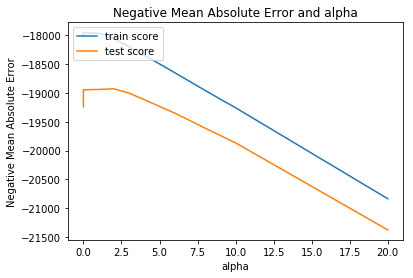

In [153]:
# plotting mean test and train scoes with alpha 
cv_results['param_alpha'] = cv_results['param_alpha'].astype('int32')

# plotting
plt.plot(cv_results['param_alpha'], cv_results['mean_train_score'])
plt.plot(cv_results['param_alpha'], cv_results['mean_test_score'])
plt.xlabel('alpha')
plt.ylabel('Negative Mean Absolute Error')
plt.title("Negative Mean Absolute Error and alpha")
plt.legend(['train score', 'test score'], loc='upper left')
plt.show()

Looking at the above trend, we observe that the optimal hyperparameter where the errors in both the train and test set can be minimized lies somewhere between 0 and 3. Let's consider the hyperparameter value alpha as 2.5 to perform ridge regression

In [154]:
alpha = 2.5
ridge = Ridge(alpha=alpha)

ridge.fit(X_train_final, y_train)
ridge.coef_

array([ 44049.73294517, 102346.4272808 ,  45674.25170935,  43200.41652007,
       -29054.67822816,  25593.59197476,  66981.5389132 ,  22261.92372301,
        40948.29872221,   -667.80123397, -20972.56608135, 146295.72983458,
        -8306.40503596, -34901.81264211, -45867.9244508 ,  23866.22813854,
        50344.69675738,  34908.64427964,  22426.51756724, -18023.45483637,
       -79585.9383027 ,  57910.6109476 , -15363.31155329, -13672.38867689,
       -24069.39444334,  19769.33791545,  21723.01118217])

### Lasso Regression

In [155]:
params = {'alpha': [0.00001, 0.0002, 0.0003, 0.0005, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 
                    1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20.0, 50.0, 100.0, 200.0, 500.0 ]}

lasso = Lasso()

# cross validation
folds=10
model_cv = GridSearchCV(estimator = lasso, 
                        param_grid = params, 
                        scoring= 'neg_mean_absolute_error', 
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)            

model_cv.fit(X_train_final, y_train) 

Fitting 10 folds for each of 31 candidates, totalling 310 fits


[Parallel(n_jobs=1)]: Done 310 out of 310 | elapsed:    1.7s finished


GridSearchCV(cv=10, error_score='raise',
       estimator=Lasso(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=1000,
   normalize=False, positive=False, precompute=False, random_state=None,
   selection='cyclic', tol=0.0001, warm_start=False),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'alpha': [1e-05, 0.0002, 0.0003, 0.0005, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20.0, 50.0, 100.0, 200.0, 500.0]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring='neg_mean_absolute_error', verbose=1)

In [156]:
cv_results = pd.DataFrame(model_cv.cv_results_)
cv_results.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_alpha,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,...,split2_train_score,split3_train_score,split4_train_score,split5_train_score,split6_train_score,split7_train_score,split8_train_score,split9_train_score,mean_train_score,std_train_score
0,0.006881,0.001041,0.000599,0.000489,1e-05,{'alpha': 1e-05},-18959.218906,-17002.097263,-19509.288152,-22720.795387,...,-17986.402106,-17390.461777,-18228.673761,-18103.474804,-17943.480596,-18262.364210,-17594.910867,-18461.096319,-18034.594515,311.193869
1,0.005584,0.000662,0.000599,0.000489,0.0002,{'alpha': 0.0002},-18959.215269,-17002.094765,-19509.287451,-22720.797173,...,-17986.401322,-17390.461823,-18228.672687,-18103.473625,-17943.479858,-18262.363776,-17594.910316,-18461.095571,-18034.593800,311.193666
2,0.005784,0.000398,0.000499,0.000499,0.0003,{'alpha': 0.0003},-18959.213355,-17002.093449,-19509.287081,-22720.798114,...,-17986.400909,-17390.461847,-18228.672124,-18103.473005,-17943.479469,-18262.363547,-17594.910027,-18461.095176,-18034.593424,311.193559
3,0.004587,0.000798,0.000499,0.000499,0.0005,{'alpha': 0.0005},-18959.209524,-17002.090821,-19509.286341,-22720.799995,...,-17986.400083,-17390.461894,-18228.670993,-18103.471763,-17943.478695,-18262.363093,-17594.909446,-18461.094387,-18034.592671,311.193344
4,0.005784,0.000599,0.000599,0.000489,0.001,{'alpha': 0.001},-18959.199949,-17002.084246,-19509.284491,-22720.804694,...,-17986.398018,-17390.462015,-18228.668167,-18103.468660,-17943.476755,-18262.361953,-17594.908000,-18461.092414,-18034.590791,311.192807


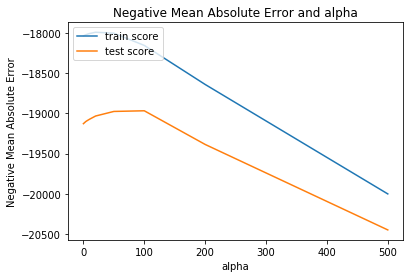

In [157]:
# plotting mean test and train scoes with alpha 
cv_results['param_alpha'] = cv_results['param_alpha'].astype('float32')

# plotting
plt.plot(cv_results['param_alpha'], cv_results['mean_train_score'])
plt.plot(cv_results['param_alpha'], cv_results['mean_test_score'])
plt.xlabel('alpha')
plt.ylabel('Negative Mean Absolute Error')

plt.title("Negative Mean Absolute Error and alpha")
plt.legend(['train score', 'test score'], loc='upper left')
plt.show()

Looking at the above trend, we observe that the optimal hyperparameter where the errors in both the train and test set can be minimized lies somewhere around alpha = 100. Let's consider the hyperparameter value alpha as 100 to perform lasso regression

In [158]:
alpha =100

lasso = Lasso(alpha=alpha)
        
lasso.fit(X_train_final, y_train) 

Lasso(alpha=100, copy_X=True, fit_intercept=True, max_iter=1000,
   normalize=False, positive=False, precompute=False, random_state=None,
   selection='cyclic', tol=0.0001, warm_start=False)

In [159]:
lasso.coef_

array([  41968.9312626 ,  112798.46180461,   45967.18223584,
         38746.4368068 ,  -26919.32782716,   24837.55381066,
         67549.46273567,   19117.20737833,   38762.65657548,
            -0.        ,  -17688.85687653,  156924.35368519,
        -11551.99489094,  -35275.58781728,  -44688.05665592,
         19996.6887183 ,   45892.37979504,   32132.87248138,
         15767.41363203,  -12110.96373033, -183877.41146606,
         66794.09255821,      -0.        ,   -4876.86817841,
            -0.        ,       0.        ,   22086.27285706])

### Predictions

We need to ensure that we've performed all the operations performed on the train set on the test set too

In [160]:
X_test.shape

(438, 212)

In [161]:
#Applying the scaling on the test set too
X_test[['LotFrontage','LotArea','LotShape','LandSlope','OverallQual','OverallCond','MasVnrArea','ExterQual','ExterCond',
         'BsmtQual','BsmtCond','BsmtExposure','BsmtFinType1','BsmtFinSF1','BsmtFinType2','BsmtFinSF2','BsmtUnfSF',
         'TotalBsmtSF','HeatingQC','CentralAir','1stFlrSF','2ndFlrSF','LowQualFinSF','GrLivArea','BsmtFullBath',
         'BsmtHalfBath','FullBath','HalfBath','BedroomAbvGr','KitchenAbvGr','KitchenQual','TotRmsAbvGrd','Fireplaces',
         'FireplaceQu','GarageFinish','GarageCars','GarageArea','GarageQual','GarageCond','WoodDeckSF','OpenPorchSF',
         'EnclosedPorch','3SsnPorch','ScreenPorch','PoolArea','MiscVal','MoSold','YrSold','GarageAge',
         'HouseAge','RemodelAge']] = scaler.fit_transform(X_test[['LotFrontage','LotArea','LotShape','LandSlope','OverallQual','OverallCond','MasVnrArea','ExterQual','ExterCond',
         'BsmtQual','BsmtCond','BsmtExposure','BsmtFinType1','BsmtFinSF1','BsmtFinType2','BsmtFinSF2','BsmtUnfSF',
         'TotalBsmtSF','HeatingQC','CentralAir','1stFlrSF','2ndFlrSF','LowQualFinSF','GrLivArea','BsmtFullBath',
         'BsmtHalfBath','FullBath','HalfBath','BedroomAbvGr','KitchenAbvGr','KitchenQual','TotRmsAbvGrd','Fireplaces',
         'FireplaceQu','GarageFinish','GarageCars','GarageArea','GarageQual','GarageCond','WoodDeckSF','OpenPorchSF',
         'EnclosedPorch','3SsnPorch','ScreenPorch','PoolArea','MiscVal','MoSold','YrSold','GarageAge',
         'HouseAge','RemodelAge']])

In [162]:
X_test_final = X_test[col]

### Ridge Regression Prediction

In [163]:
from sklearn import metrics

In [164]:
# predict
y_train_pred_ridge = ridge.predict(X_train_final)
print(metrics.r2_score(y_true=y_train, y_pred=y_train_pred_ridge))
y_test_pred_ridge = ridge.predict(X_test_final)
print(metrics.r2_score(y_true=y_test, y_pred=y_test_pred_ridge))

0.8616958548331781
0.8211504707194259


In [165]:
# lasso model parameters
model_parameters = list(ridge.coef_)
model_parameters.insert(0, ridge.intercept_)
model_parameters = [round(x, 3) for x in model_parameters]
cols = X_train_final.columns
cols = cols.insert(0, "constant")
ridge_param = pd.DataFrame(list(zip(cols, model_parameters))).sort_values(by =1, ascending = False)
ridge_param.loc[ridge_param[1]!=0,].reset_index(drop=True)

,0,1
0,GrLivArea,146295.730
1,OverallQual,102346.427
2,BsmtFinSF1,66981.539
3,RoofMatlWdShngl,57910.611
4,Nghbr_NoRidge,50344.697
5,OverallCond,45674.252
6,LotArea,44049.733
7,ExterQual,43200.417
8,BsmtUnfSF,40948.299
9,Nghbr_NridgHt,34908.644


### Lasso Regression Prediction

In [166]:
# predict
y_train_pred_lasso = lasso.predict(X_train_final)
print(metrics.r2_score(y_true=y_train, y_pred=y_train_pred_lasso))
y_test_pred_lasso = lasso.predict(X_test_final)
print(metrics.r2_score(y_true=y_test, y_pred=y_test_pred_lasso))

0.8658429009940835
0.8127533979611925


In [167]:
# lasso model parameters
model_parameters = list(lasso.coef_)
model_parameters.insert(0, lasso.intercept_)
model_parameters = [round(x, 3) for x in model_parameters]
cols = X_train_final.columns
cols = cols.insert(0, "constant")
lasso_param = pd.DataFrame(list(zip(cols, model_parameters))).sort_values(by =1, ascending = False)
lasso_param.loc[lasso_param[1]!=0,].reset_index(drop=True)

,0,1
0,GrLivArea,156924.354
1,OverallQual,112798.462
2,BsmtFinSF1,67549.463
3,RoofMatlWdShngl,66794.093
4,OverallCond,45967.182
5,Nghbr_NoRidge,45892.380
6,LotArea,41968.931
7,BsmtUnfSF,38762.657
8,ExterQual,38746.437
9,Nghbr_NridgHt,32132.872


As seen above, we went with the process of performing RFE to bring the number of features down to ~40 variables. Post that, we went and fine-tuned the model, and then performed generalized regression using ridge and lasso techniques. Within each technique, we used the grid search cross validation technique to identify the optimum value of the hyperparameter alpha. Post that, we went ahead with prediction based on the 2 models created and evaluated the performance of each of them separately

### Business Goal

The company wants to know:

- Which variables are significant in predicting the price of a house, and
- How well those variables describe the price of a house.
- Also, determine the optimal value of lambda for ridge and lasso regression.

*The Lasso regression model would be the most optimal model that we would use in this case. That is because Lasso has the capability of performing feature selection by making the coefficient of insignificant variables as 0. This was the csae in our model too, whereby the Lasso regression produced a model that had fewer coefficients than the Ridge regression technique, despite ensuring that the performance (Error and R-squared) is not compromised much <br><br>
The optimal values of lambda for:*
- Ridge regression was 2.5
- Lasso regression was 100
<br>

*The most important/significant features that predict the price of the house are: <br>
GrLivArea > OverallQual > BsmtFinSF1 > RoofMatlWdShngl > OverallCond > Nghbr_NoRidge > LotArea > BsmtUnfSF > ExterQual
